In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV

## Mushrooms EDA

In [122]:
df = pd.read_csv('mushrooms_df.csv')

In [123]:
df_dummies=pd.read_csv('df_dummies.csv')

df_dummies.head()

,edible_poisonous_p,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [124]:
df.head()

,edible_poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [125]:
df.describe()

,edible_poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [126]:
df.head()

,edible_poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [127]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


In [8]:
df['capshape_encoded'] = label_encoder.fit_transform(df['cap_shape'])
df['gillcolor_encoded'] = label_encoder.fit_transform(df['gill_color'])

In [9]:
df[['capshape_encoded','gillcolor_encoded']]

,capshape_encoded,gillcolor_encoded
0,5,4
1,5,4
2,0,5
3,5,5
4,5,4
5,5,5
6,0,2
7,0,5
8,5,7
9,0,2


In [128]:
df.head()

,edible_poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [129]:
#!pip install pandas_profiling

In [130]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,22
Number of observations,8124
Total Missing (%),0.0%
Total size in memory,1.4 MiB
Average record size in memory,176.0 B
Numeric,0
Categorical,22
Boolean,0
Date,0
Text (Unique),0
Rejected,0


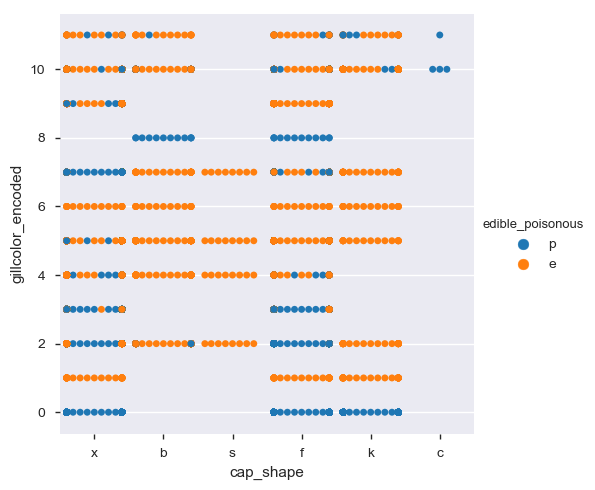

In [20]:
sns.catplot(x="cap_shape", y="gillcolor_encoded", hue="edible_poisonous", kind="swarm", data=df);

In [91]:
def plot_percent_bar(df,column):
    # group Dataframe by preferred column
    groups = list(df.groupby(column))
    # create list for x_axis
    r = []
#     create list for green bar
    green = []
#     loop through groups and append data to green bar and r
    for i in range(0,len(groups)):
        passed =  len(groups[i][1][groups[i][1]['edible_poisonous'] == 'e'])
        r_ready = groups[i][1].reset_index()
        length = len(groups[i][1])
        r.append(str(r_ready.loc[0, column]))# + ', ' + str(length)))

            
        green.append(passed/length*100)
    red = [100-i for i in green]
    plt.bar(r, green,
        color='teal',
        edgecolor='white',
        width = 0.85
           )
    plt.bar(r, red,
        color='coral',
        bottom=green,
        edgecolor='white',
        width = 0.85,
        )
    plt.ylabel(column.capitalize())

In [92]:
df.head()

,edible_poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat,capshape_encoded,gillcolor_encoded
0,p,x,s,n,t,p,f,c,n,k,...,w,w,w,o,p,k,s,u,5,4
1,e,x,s,y,t,a,f,c,b,k,...,w,w,w,o,p,n,n,g,5,4
2,e,b,s,w,t,l,f,c,b,n,...,w,w,w,o,p,n,n,m,0,5
3,p,x,y,w,t,p,f,c,n,n,...,w,w,w,o,p,k,s,u,5,5
4,e,x,s,g,f,n,f,w,b,k,...,w,w,w,o,e,n,a,g,5,4


Text(0.5, 1.0, 'Correlation Heatmap of Key Features')

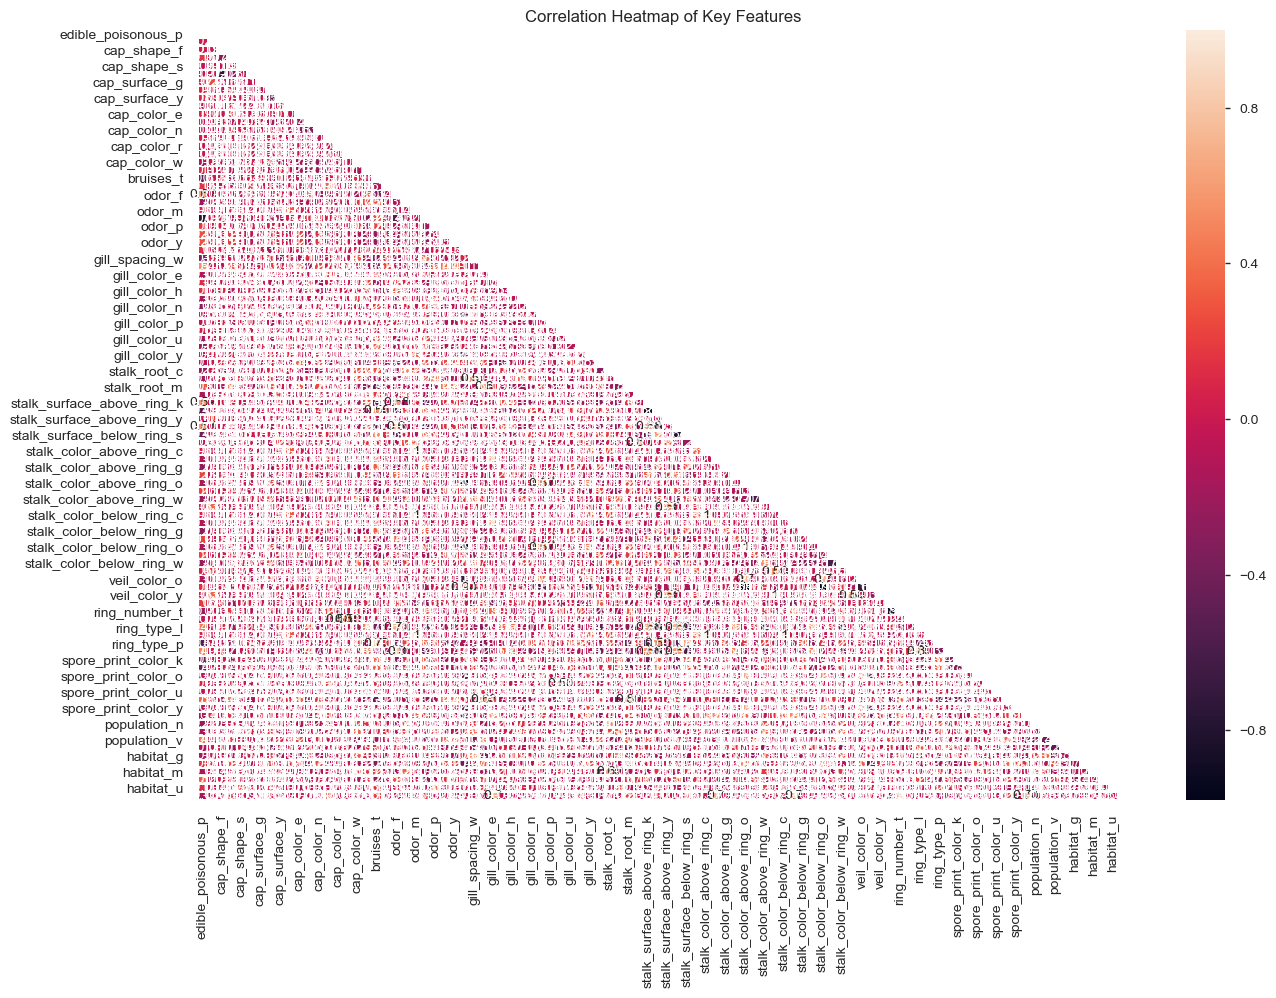

In [133]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
mask = np.zeros_like(df_dummies.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_dummies.corr(), linewidth=0.5, mask=mask, annot=True)
plt.title('Correlation Heatmap of Key Features')

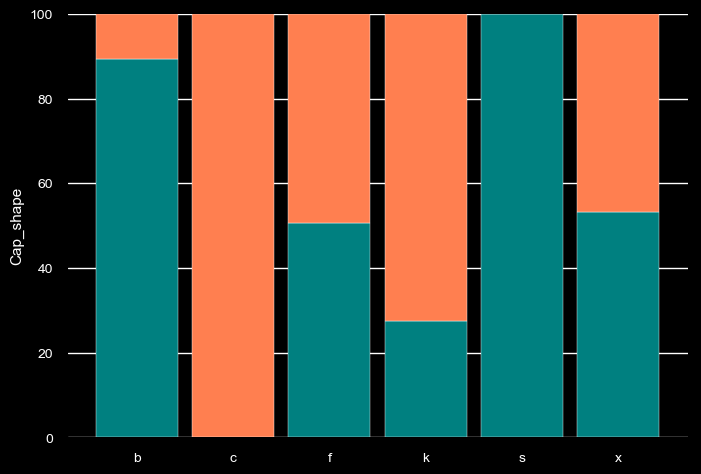

In [118]:
plot_percent_bar(df,'cap_shape')

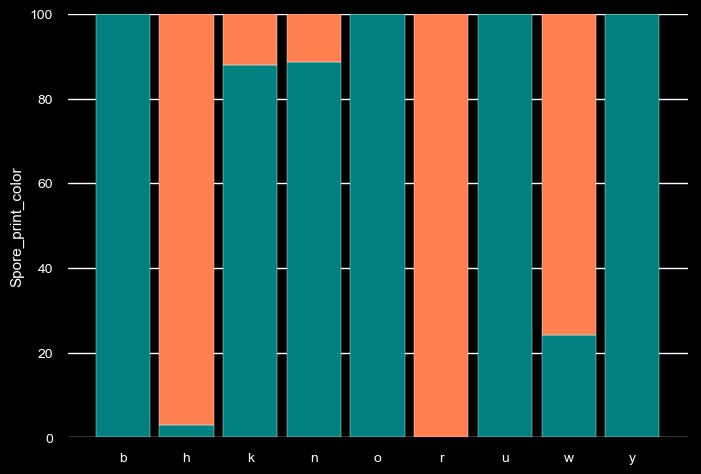

In [161]:
plt.style.use('dark_background')
plot_percent_bar(df,'spore_print_color')

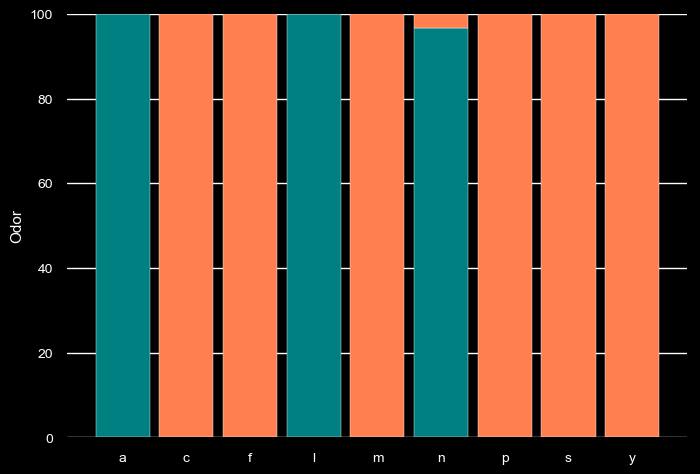

In [120]:
plot_percent_bar(df,'odor')

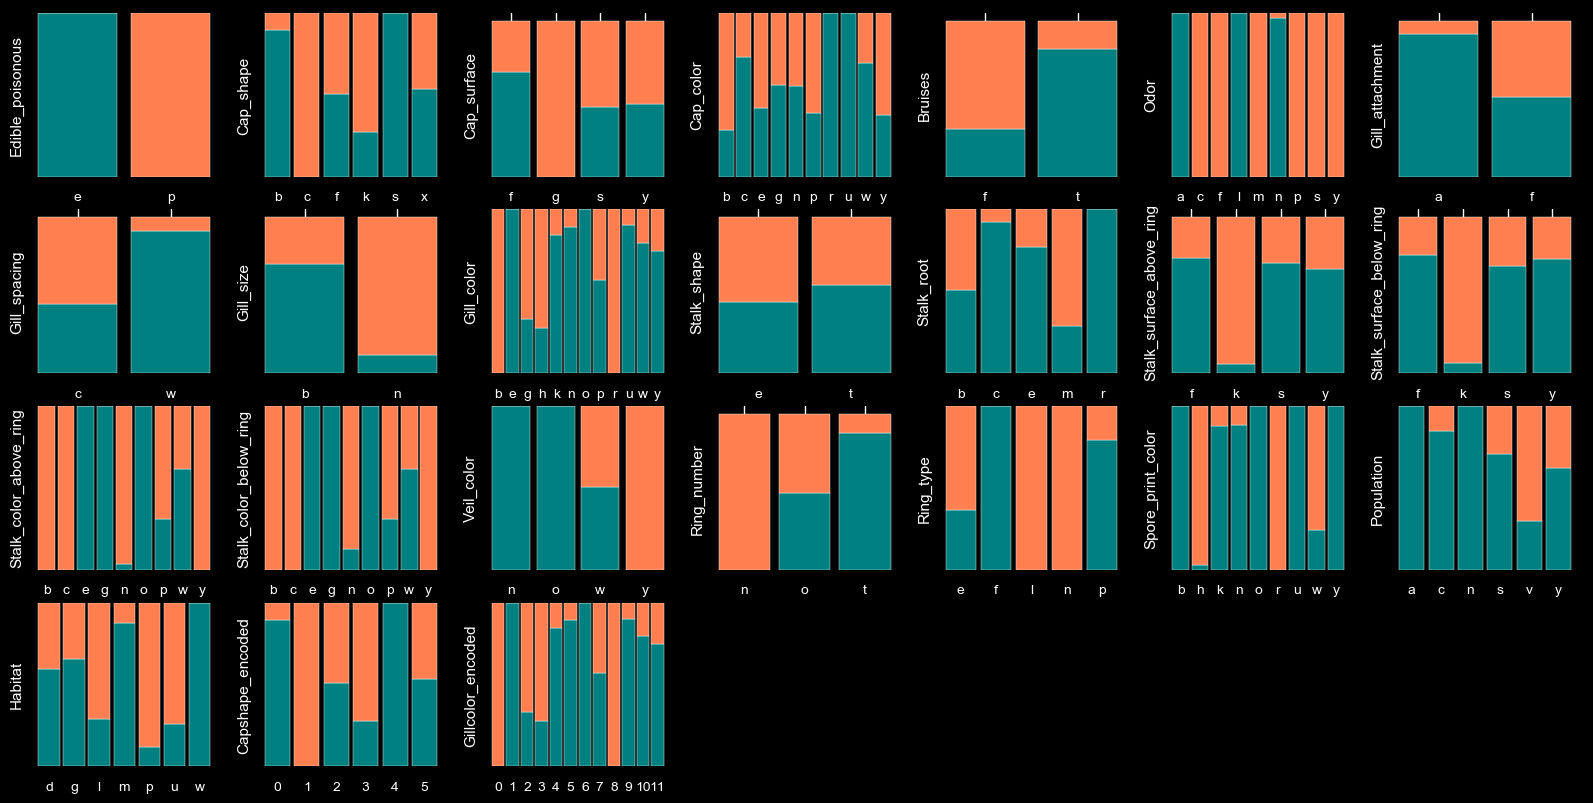

In [119]:
data_cols = list(df.columns)
plt.figure(figsize = (20,20))
for i, col in enumerate(data_cols):
    plt.subplot(8,7,i+1)
    plot_percent_bar(df,col)
    plt.yticks([])

In [20]:
df.columns

Index(['edible_poisonous', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat', 'capshape_encoded',
       'gillcolor_encoded'],
      dtype='object')

Attribute Information:
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
bruises?: bruises=t,no=f
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d
gill-size: broad=b,narrow=n
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
stalk-shape: enlarging=e,tapering=t
stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
veil-type: partial=p,universal=u (deleted from DF)
veil-color: brown=n,orange=o,white=w,yellow=y
ring-number: none=n,one=o,two=t
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

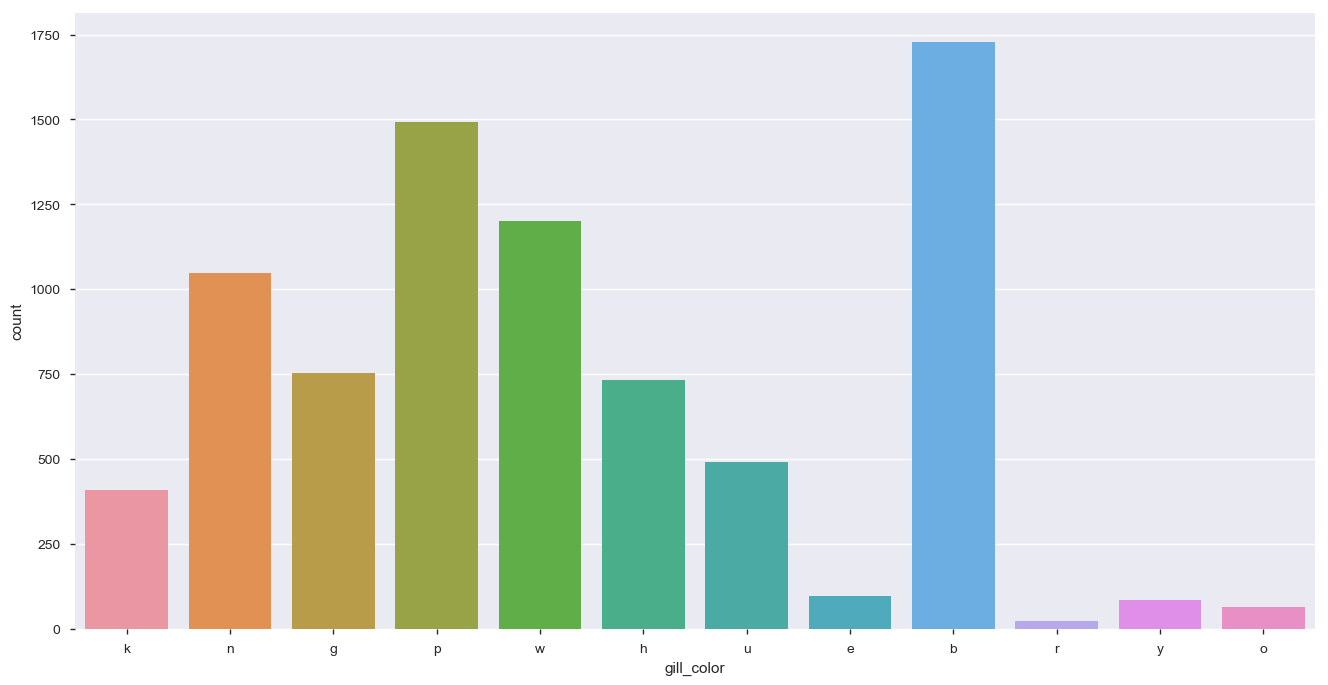

In [13]:
plt.figure(figsize=(16, 8))
#sns.set(font_scale=1.5)
sns.countplot(x='gill_color',data=df)


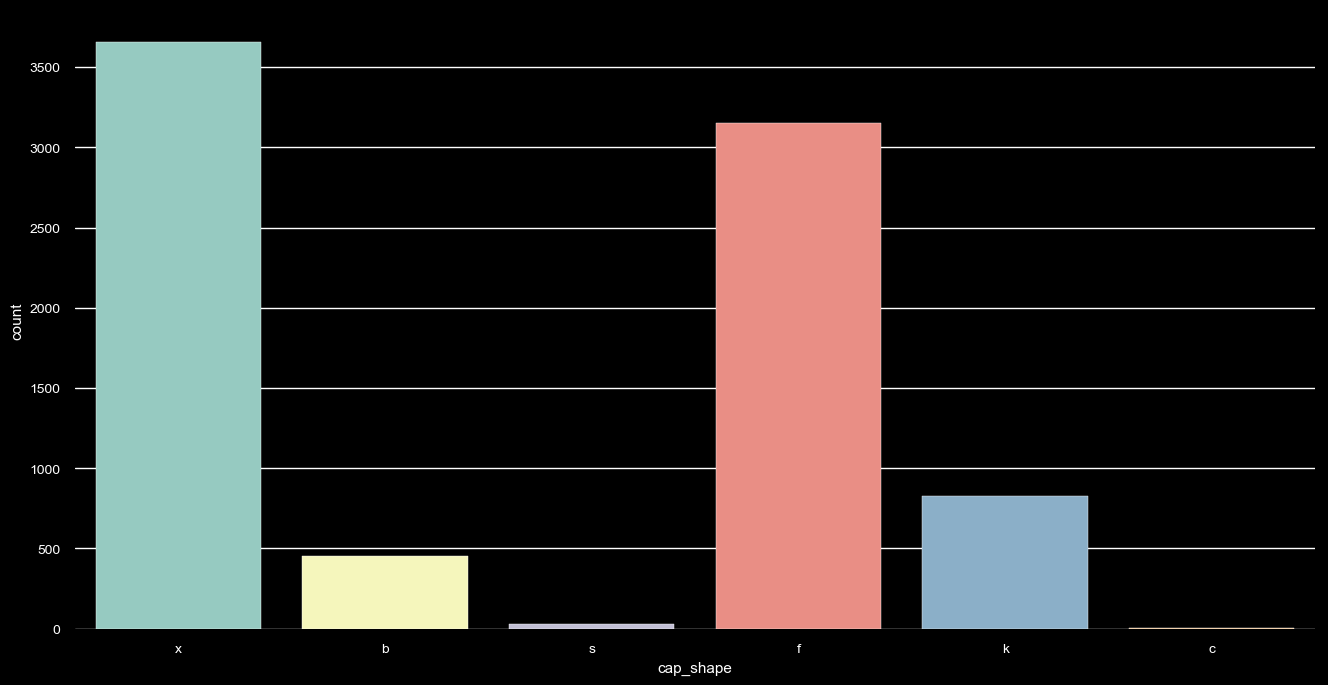

In [162]:
plt.figure(figsize=(16, 8))
#sns.set(font_scale=1.5)
sns.countplot(x='cap_shape',data=df)

In [28]:
# create table for heatmap visualization (next step)
dt_grade = data_sub.pivot_table(index='INSPECTION MONTH', columns='gill_color',values='GRADE') 

# visualizing the relationship between when restaurant inspection was conducted and grade
plt.figure(figsize=(20,10))
sns.heatmap(dt_grade, annot=True, cmap='GnBu_r')

NameError: name 'data_sub' is not defined

In [14]:
df.edible_poisonous.unique()

array(['p', 'e'], dtype=object)

In [30]:
sns.catplot(x="cap_shape", y="edible_poisonous", hue="edible_poisonous", kind="swarm", data=df);

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [15]:
df.cap_shape

0       x
1       x
2       b
3       x
4       x
5       x
6       b
7       b
8       x
9       b
10      x
11      x
12      b
13      x
14      x
15      s
16      f
17      x
18      x
19      x
20      b
21      x
22      b
23      b
24      b
25      f
26      x
27      x
28      f
29      x
       ..
8094    b
8095    x
8096    k
8097    k
8098    k
8099    k
8100    f
8101    k
8102    x
8103    k
8104    k
8105    k
8106    k
8107    x
8108    k
8109    b
8110    x
8111    k
8112    k
8113    k
8114    f
8115    x
8116    k
8117    k
8118    k
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap_shape, Length: 8124, dtype: object

In [23]:
sns.barplot(x="cap_shape", y="ring_number", hue="edible_poisonous", data=df)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [31]:
features=['edible_poisonous', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat']

In [164]:

df_dummies.columns

Index(['edible_poisonous_p', 'cap_shape_c', 'cap_shape_f', 'cap_shape_k',
       'cap_shape_s', 'cap_shape_x', 'cap_surface_g', 'cap_surface_s',
       'cap_surface_y', 'cap_color_c', 'cap_color_e', 'cap_color_g',
       'cap_color_n', 'cap_color_p', 'cap_color_r', 'cap_color_u',
       'cap_color_w', 'cap_color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l',
       'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill_attachment_f',
       'gill_spacing_w', 'gill_size_n', 'gill_color_e', 'gill_color_g',
       'gill_color_h', 'gill_color_k', 'gill_color_n', 'gill_color_o',
       'gill_color_p', 'gill_color_r', 'gill_color_u', 'gill_color_w',
       'gill_color_y', 'stalk_shape_t', 'stalk_root_c', 'stalk_root_e',
       'stalk_root_m', 'stalk_root_r', 'stalk_surface_above_ring_k',
       'stalk_surface_above_ring_s', 'stalk_surface_above_ring_y',
       'stalk_surface_below_ring_k', 'stalk_surface_below_ring_s',
       'stalk_surface_below_ring_y', 'stalk_color_above_ring_c',
       

### Models

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split



features_base = df_dummies[['cap_shape_c', 'cap_shape_f', 'cap_shape_k',
       'cap_shape_s', 'cap_shape_x', 'cap_surface_g', 'cap_surface_s',
       'cap_surface_y', 'cap_color_c', 'cap_color_e', 'cap_color_g',
       'cap_color_n', 'cap_color_p', 'cap_color_r', 'cap_color_u',
       'cap_color_w', 'cap_color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l',
       'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill_attachment_f',
       'gill_spacing_w', 'gill_size_n', 'gill_color_e', 'gill_color_g',
       'gill_color_h', 'gill_color_k', 'gill_color_n', 'gill_color_o',
       'gill_color_p', 'gill_color_r', 'gill_color_u', 'gill_color_w',
       'gill_color_y', 'stalk_shape_t', 'stalk_root_c', 'stalk_root_e',
       'stalk_root_m', 'stalk_root_r', 'stalk_surface_above_ring_k',
       'stalk_surface_above_ring_s', 'stalk_surface_above_ring_y',
       'stalk_surface_below_ring_k', 'stalk_surface_below_ring_s',
       'stalk_surface_below_ring_y', 'stalk_color_above_ring_c',
       'stalk_color_above_ring_e', 'stalk_color_above_ring_g',
       'stalk_color_above_ring_n', 'stalk_color_above_ring_o',
       'stalk_color_above_ring_p', 'stalk_color_above_ring_w',
       'stalk_color_above_ring_y', 'stalk_color_below_ring_c',
       'stalk_color_below_ring_e', 'stalk_color_below_ring_g',
       'stalk_color_below_ring_n', 'stalk_color_below_ring_o',
       'stalk_color_below_ring_p', 'stalk_color_below_ring_w',
       'stalk_color_below_ring_y', 'veil_color_o', 'veil_color_w',
       'veil_color_y', 'ring_number_o', 'ring_number_t', 'ring_type_f',
       'ring_type_l', 'ring_type_n', 'ring_type_p', 'spore_print_color_h',
       'spore_print_color_k', 'spore_print_color_n', 'spore_print_color_o',
       'spore_print_color_r', 'spore_print_color_u', 'spore_print_color_w',
       'spore_print_color_y', 'population_c', 'population_n', 'population_s',
       'population_v', 'population_y', 'habitat_g', 'habitat_l', 'habitat_m',
       'habitat_p', 'habitat_u', 'habitat_w']]
target= df_dummies.edible_poisonous_p


In [22]:
features_base.head()

,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,cap_color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
PolynomialFeatures

sklearn.preprocessing.data.PolynomialFeatures

In [28]:
df_poly.drop('1', axis=1, inplace=True)

In [30]:
df_poly.head()

,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,cap_color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [65]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
poly.fit(features_base)
column_names = poly.get_feature_names(features_base.columns)
df_poly= pd.DataFrame(poly.transform(features_base), columns=column_names)

ccc = list(df_poly.columns)
ccc

['cap_shape_c',
 'cap_shape_f',
 'cap_shape_k',
 'cap_shape_s',
 'cap_shape_x',
 'cap_surface_g',
 'cap_surface_s',
 'cap_surface_y',
 'cap_color_c',
 'cap_color_e',
 'cap_color_g',
 'cap_color_n',
 'cap_color_p',
 'cap_color_r',
 'cap_color_u',
 'cap_color_w',
 'cap_color_y',
 'bruises_t',
 'odor_c',
 'odor_f',
 'odor_l',
 'odor_m',
 'odor_n',
 'odor_p',
 'odor_s',
 'odor_y',
 'gill_attachment_f',
 'gill_spacing_w',
 'gill_size_n',
 'gill_color_e',
 'gill_color_g',
 'gill_color_h',
 'gill_color_k',
 'gill_color_n',
 'gill_color_o',
 'gill_color_p',
 'gill_color_r',
 'gill_color_u',
 'gill_color_w',
 'gill_color_y',
 'stalk_shape_t',
 'stalk_root_c',
 'stalk_root_e',
 'stalk_root_m',
 'stalk_root_r',
 'stalk_surface_above_ring_k',
 'stalk_surface_above_ring_s',
 'stalk_surface_above_ring_y',
 'stalk_surface_below_ring_k',
 'stalk_surface_below_ring_s',
 'stalk_surface_below_ring_y',
 'stalk_color_above_ring_c',
 'stalk_color_above_ring_e',
 'stalk_color_above_ring_g',
 'stalk_color_abo

In [131]:
df_poly.corr()> abs(.4)

,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,cap_color_e,...,habitat_l habitat_m,habitat_l habitat_p,habitat_l habitat_u,habitat_l habitat_w,habitat_m habitat_p,habitat_m habitat_u,habitat_m habitat_w,habitat_p habitat_u,habitat_p habitat_w,habitat_u habitat_w
cap_shape_c,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cap_shape_f,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cap_shape_k,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cap_shape_s,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cap_shape_x,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cap_surface_g,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cap_surface_s,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
cap_surface_y,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
cap_color_c,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
cap_color_e,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [175]:
X_train_base, X_test_base, y_train_base, y_test = train_test_split(
    df_poly[['odor_c', 'odor_f', 'odor_l',
       'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y']], target, random_state=14,test_size=0.2)

In [176]:
cols = list(X_train_base.columns)

In [177]:
for c in cols:
    print(X_train_base[c].corr(y_train_base))

0.16368174471241098
0.623908439193259
-0.22340605665589996
0.06993675487624652
-0.7898761443744923
0.18157553760565612
0.2824432268655734
0.2896896213494921


In [178]:
X_train_base.corr(y_train_base)

/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [179]:
y_train_base.head()

8042    0
3454    1
7764    1
7871    0
4156    0
Name: edible_poisonous_p, dtype: int64

In [180]:
from sklearn.utils import resample

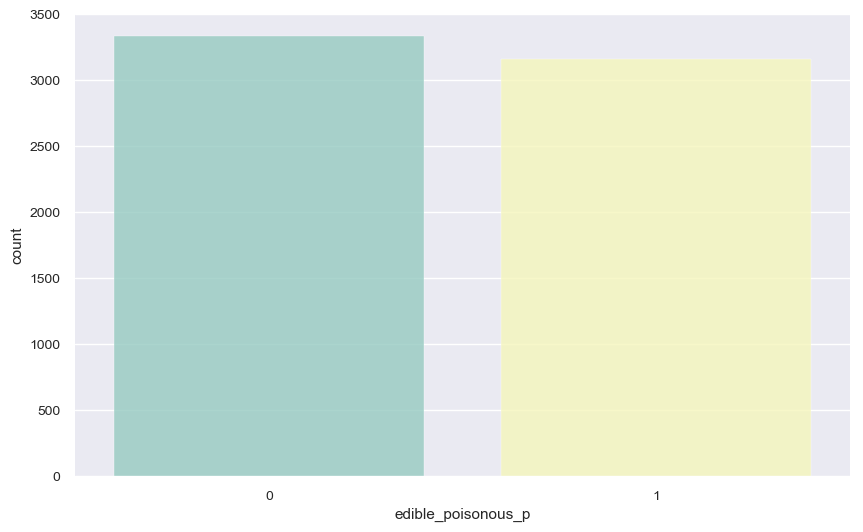

In [181]:
sns.set_style("darkgrid")

# plot class imbalance
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y_train_base, alpha=0.8)

### Fitting logistic regression model

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score,confusion_matrix, recall_score



In [183]:
# Create logistic regression
logistic = linear_model.LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = C_param_range = [0.01, 0.02, 0.1, 0.5, 1, 2, 5, 10]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [184]:
# Create grid search using 5-fold cross validation
clf_gs = GridSearchCV(logistic, hyperparameters, cv = 5 , scoring='f1') 

In [185]:
# Fit grid search
model = clf_gs.fit(X_train_base, y_train_base)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [186]:
# View best hyperparameters
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.1


In [187]:
y_pred_train = model.best_estimator_.predict(X_train_base)

y_pred_test = model.best_estimator_.predict(X_test_base)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train_base, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.9860554576053855
Testing F1 Score: 0.9775967413441955


In [71]:
model_params = list(zip(feature_cols, model.best_estimator_.coef_[0]))

model_params.sort(key = lambda x: abs(x[1]), reverse=True)
model_params

NameError: name 'feature_cols' is not defined

In [188]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,confusion_matrix, recall_score


In [190]:
#check overall metrics on test data
print('Accuracy:',accuracy_score(y_test, y_pred_test))
print('Precision:',precision_score(y_test, y_pred_test))
print('Recall:', recall_score(y_test, y_pred_test))
print('F1:', f1_score(y_test, y_pred_test))

Accuracy: 0.9796923076923076
Precision: 1.0
Recall: 0.9561752988047809
F1: 0.9775967413441955


In [191]:
#plot confusion matrix for test data
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[872   0]
 [ 33 720]]


<h1> Random Forest

In [58]:
len(y_test)

1625

In [59]:
len(y_train_base)

6499

In [60]:
len(y_pred_train)

6499

In [66]:
len(rfc_pred)

1625